# Classification

In [286]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [287]:
df_train= pd.read_csv('train.csv')
df_train.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,\N,\N,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,\N,\N,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,\N,\N,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,\N,\N,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020,80,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


In [288]:
df_test= pd.read_csv('test.csv')
df_test.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Geologist of Animal Collective Performs Live a...,"(9, 10]",2015,\N,21,0.0,15,1,10,7,...,video,0,False,True,0,1,0,15,['US'],"Music,Short"
1,Shan gou 1999,"(4, 5]",1999,\N,\N,0.0,304,1,10,10,...,movie,0,False,True,0,4,8,304,['HK'],Horror
2,The Craftsman: Preserving the Last Higgins Boat,"(8, 9]",2023,\N,\N,0.0,10,1,10,2,...,tvSpecial,0,False,True,0,1,0,10,['US'],Reality-TV
3,Week 3: Tuesday,"(6, 7]",2020,\N,\N,0.0,11,1,10,0,...,tvEpisode,0,False,True,0,1,0,11,['GB'],Game-Show
4,Traumhaus,"(5, 6]",1999,\N,90,NaN,145,1,10,2,...,tvEpisode,0,False,True,0,1,0,145,['DE'],"Crime,Drama,Mystery"


# Preprocessing

In [289]:
df_train['rating'] = df_train['rating'].astype(str).str.extract(r'\((\d+),\s*(\d+)\]')[1].astype(float)

df_test['rating'] = df_test['rating'].astype(str).str.extract(r'\((\d+),\s*(\d+)\]')[1].astype(float)

Filling missing values

In [291]:
df_train['runtimeMinutes'] = pd.to_numeric(df_train['runtimeMinutes'], errors='coerce')  # Ensure it's numeric
df_train['runtimeMinutes'] = df_train['runtimeMinutes'].fillna(df_train['runtimeMinutes'].mode()[0])  # Fill NaN


df_test['runtimeMinutes'] = pd.to_numeric(df_test['runtimeMinutes'], errors='coerce')  # Ensure it's numeric
df_test['runtimeMinutes'] = df_test['runtimeMinutes'].fillna(df_test['runtimeMinutes'].mode()[0])  # Fill NaN

In [292]:
df_train['awardWins'] = pd.to_numeric(df_train['awardWins'], errors='coerce')   # Ensure it's numeric
df_train['awardWins'] = df_train['awardWins'].fillna(df_train['awardWins'].mode()[0])  # Fill NaN

df_test['awardWins'] = pd.to_numeric(df_test['awardWins'], errors='coerce')   # Ensure it's numeric
df_test['awardWins'] = df_test['awardWins'].fillna(df_test['awardWins'].mode()[0])  # Fill NaN

In [293]:
df_train['genres']=df_train['genres'].fillna(df_train['genres']=='Unknown')

df_test['genres']=df_test['genres'].fillna(df_test['genres']=='Unknown')

Converting Categorical data

In [294]:
title_type=sorted(df_train['titleType'].unique())
title_type_mapping =dict(zip(title_type, range( 0, len(title_type)+1)))
df_train['titleType_Val']=df_train['titleType'].map(title_type_mapping).astype(int)

title_type=sorted(df_test['titleType'].unique())
title_type_mapping =dict(zip(title_type, range( 0, len(title_type)+1)))
df_test['titleType_Val']=df_test['titleType'].map(title_type_mapping).astype(int)

Feature reduction

In [295]:
df_train.drop(['originalTitle', 'bestRating', 'worstRating','isRatable', 'countryOfOrigin','endYear', 'genres',\
         'titleType' ], axis=1, inplace=True)

df_test.drop(['originalTitle', 'bestRating', 'worstRating','isRatable', 'countryOfOrigin','endYear', 'genres',\
         'titleType' ], axis=1, inplace=True)

In [296]:
df_train.columns

Index(['rating', 'startYear', 'runtimeMinutes', 'awardWins', 'numVotes',
       'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal',
       'awardNominationsExcludeWins', 'canHaveEpisodes', 'isAdult',
       'numRegions', 'userReviewsTotal', 'ratingCount', 'titleType_Val'],
      dtype='object')

Outlier reduction

In [297]:
def numeric_cols(data):
    numeric_cols = data.select_dtypes(include=[int, float])
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = ~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)
    df_=data[mask]
    return df_
    
    

In [298]:
df_tr=numeric_cols(df_train)
df_te=numeric_cols(df_test)

In [299]:
df_tr.shape

(7832, 16)

In [239]:
df_te.shape

(2808, 16)

# partitioning

In [302]:
from sklearn.model_selection import train_test_split

In [306]:
df_tr.columns

Index(['rating', 'startYear', 'runtimeMinutes', 'awardWins', 'numVotes',
       'totalImages', 'totalVideos', 'totalCredits', 'criticReviewsTotal',
       'awardNominationsExcludeWins', 'canHaveEpisodes', 'isAdult',
       'numRegions', 'userReviewsTotal', 'ratingCount', 'titleType_Val'],
      dtype='object')

In [316]:
def attr(data):
    attributes = [col for col in df_tr.columns if col != 'titleType_Val']
    X=data[attributes].values
    y=data['titleType_Val'].values
    return X, y, attributes


In [317]:
X_train , y_train, tr_attribu= attr(df_tr)
X_test , y_test, te_attribu= attr(df_te)

# DECISION TREE

In [318]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [319]:
dt = DecisionTreeClassifier()

In [320]:
%%time
dt.fit(X_train, y_train)

CPU times: total: 31.2 ms
Wall time: 82.9 ms


DecisionTreeClassifier()

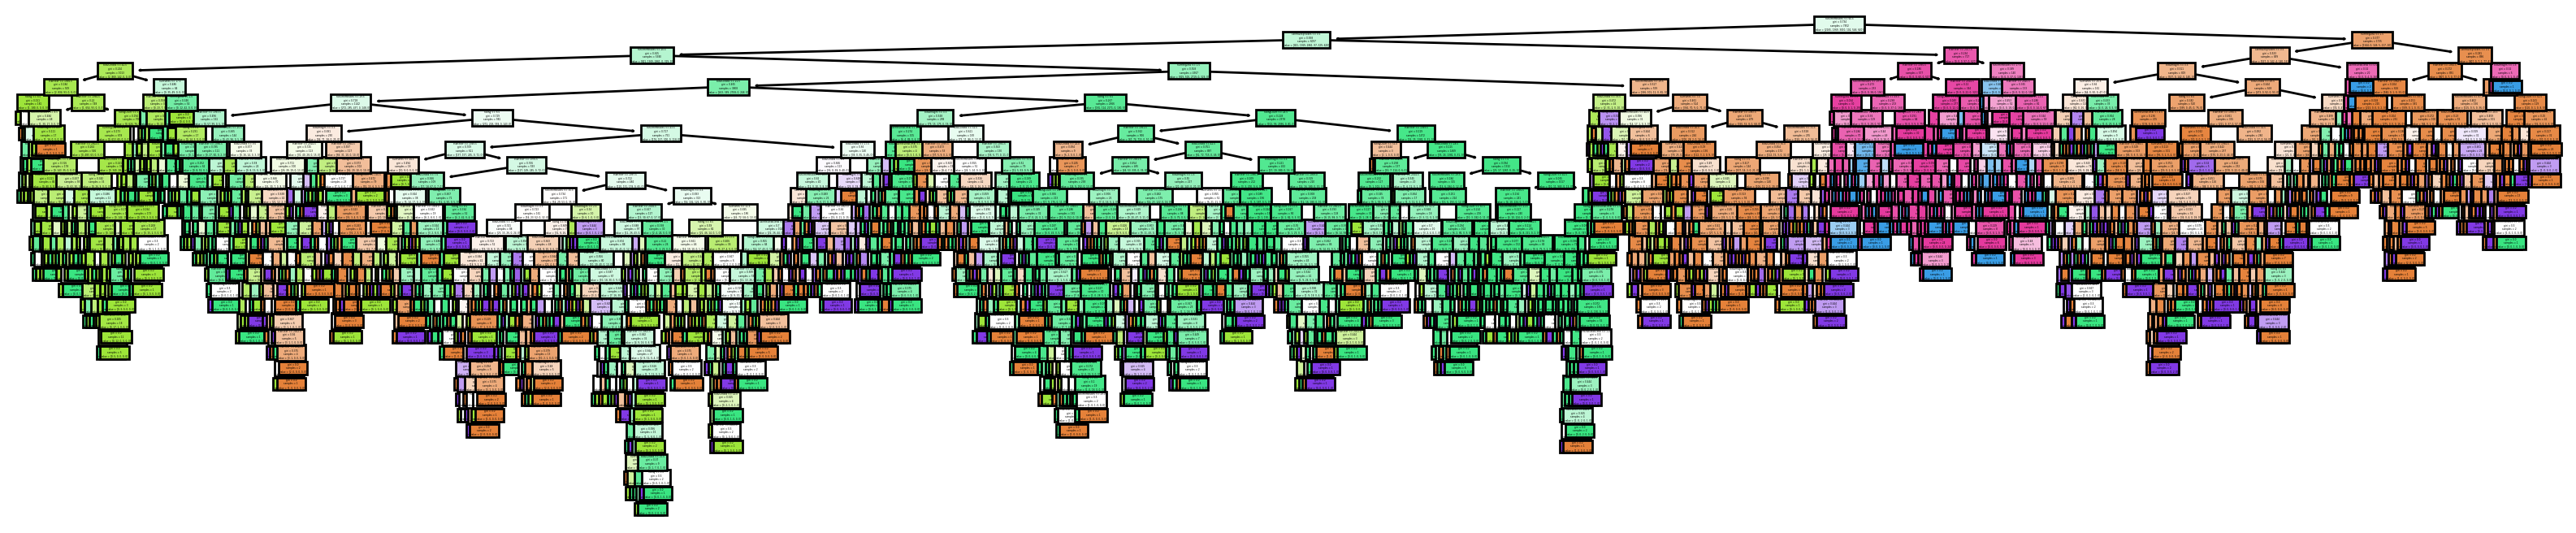

In [321]:
plt.figure(figsize=(20, 4), dpi=200)
plot_tree(dt, feature_names=tr_attribu, filled=True)
plt.show()

In [322]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [323]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [324]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 0.9998723186925434
Train F1-score [1.         1.         0.99983391 1.         0.99908341 1.        ]

Test Accuracy 0.6852646638054364
Test F1-score [0.6993007  0.6795017  0.76484123 0.18604651 0.18097448 0.84304933]


In [325]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       746
           1       0.65      0.71      0.68       424
           2       0.82      0.72      0.76      1156
           3       0.18      0.20      0.19        41
           4       0.17      0.19      0.18       204
           5       0.85      0.84      0.84       225

    accuracy                           0.69      2796
   macro avg       0.56      0.56      0.56      2796
weighted avg       0.70      0.69      0.69      2796



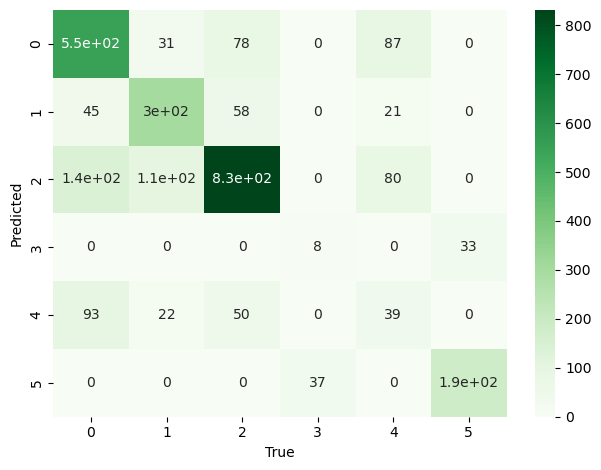

In [326]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

feature importance

In [327]:
zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

runtimeMinutes 0.3268587863858769
totalCredits 0.13622122102867054
canHaveEpisodes 0.1308960472692375
startYear 0.10495351416913973
userReviewsTotal 0.08122151765691006
numVotes 0.05674655891063884
titleType_Val 0.05166380267031092
rating 0.043948498834872306
totalImages 0.04046372900356187
ratingCount 0.01932190051898984
criticReviewsTotal 0.007704423551791494
awardWins 0.0
totalVideos 0.0
awardNominationsExcludeWins 0.0
numRegions 0.0


In [328]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

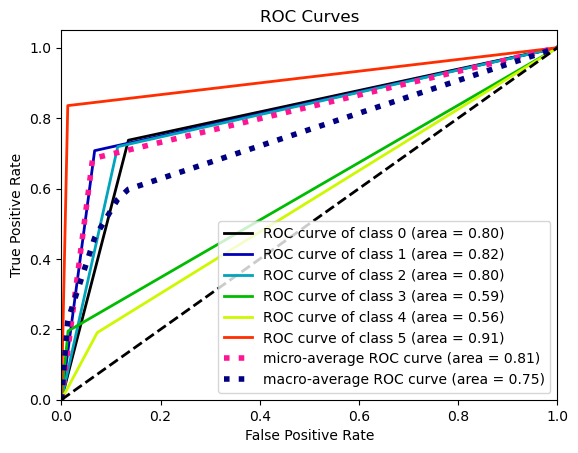

In [329]:
plot_roc(y_test, dt.predict_proba(X_test))
plt.show()

# KNN

In [330]:
from sklearn.neighbors import KNeighborsClassifier

In [332]:
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [333]:
y_test_pred = clf.predict(X_test)
y_test_pred

array([2, 0, 0, ..., 0, 4, 2])

In [334]:
y_test

array([2, 2, 0, ..., 2, 0, 3])

In [335]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.630901287553648


In [336]:
# score: Return the mean accuracy on the given test data and labels.
clf.score(X_test, y_test)

0.630901287553648

In [338]:
# KNeighborsClassifier.score is doing this
(y_test_pred == y_test).sum() / len(y_test)

0.630901287553648

Performance evaluation

In [340]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66       746
           1       0.68      0.66      0.67       424
           2       0.67      0.78      0.72      1156
           3       0.00      0.00      0.00        41
           4       0.27      0.10      0.14       204
           5       0.28      0.07      0.11       225

    accuracy                           0.63      2796
   macro avg       0.42      0.39      0.39      2796
weighted avg       0.58      0.63      0.60      2796



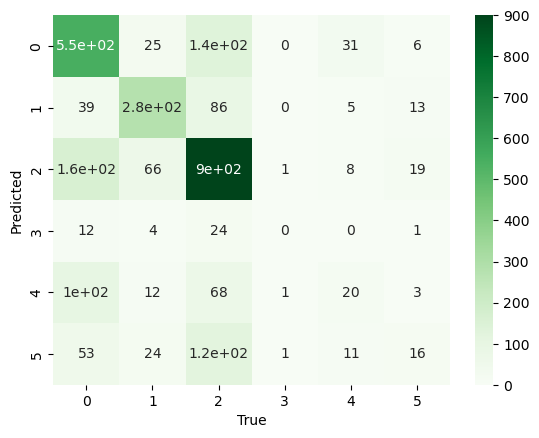

In [341]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

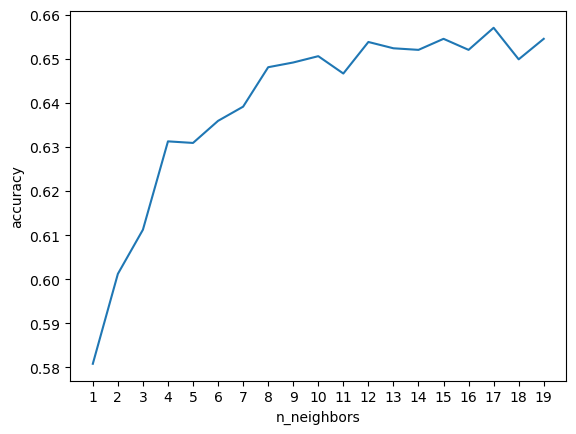

In [343]:
n_neighbors = range(1,20)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plt.plot(scores)
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()